# Análisis de Histogramas de Imágenes
Este notebook descarga imágenes, las convierte a escala de grises y analiza sus histogramas.
También compara las características principales de los histogramas como la media y la varianza.

Este script utiliza varias librerías para realizar operaciones con imágenes:
 - `requests`: Para descargar imágenes desde una URL.
 - `Pillow (PIL)`: Para procesar y manipular imágenes, incluyendo la conversión a escala de grises.
 - `matplotlib`: Para graficar las imágenes y sus histogramas.


In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# URLs de las imágenes
url1 = "https://images.pexels.com/photos/25686145/pexels-photo-25686145/free-photo-of-straw-in-cocktail-glass.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
url2 = "https://images.pexels.com/photos/29935743/pexels-photo-29935743/free-photo-of-snow-covered-mountainside-with-dramatic-texture.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"

### Función para descargar y convertir imagen a escala de grises.

Esta función tiene de entrada una URL, descarga la imagen desde esa URL,
la abre utilizando la librería Pillow y la convierte a escala de grises.
Esto simplifica el análisis al reducir la información a un solo canal de intensidad.


In [3]:
def get_gray_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image.convert("L")

In [4]:
# Obtener imágenes en escala de grises
gray_image1 = get_gray_image(url1)
gray_image2 = get_gray_image(url2)

### Calcular histograma

Los histogramas son representaciones gráficas que muestran la distribución de los niveles de intensidad de los píxeles en una imagen.

Son útiles para analizar el brillo, el contraste y la distribución tonal de una imagen, y permiten identificar características clave.


In [5]:
# Obtener datos de histogramas
histogram_data1 = gray_image1.histogram()
histogram_data2 = gray_image2.histogram()

### Crear la figura con subgráficos
Esta figura contiene 4 subgráficos organizados en una matriz de 2 filas por 2 columnas:
 - Primera fila: La primera celda muestra la imagen 1 en escala de grises, y la segunda celda su histograma.
 - Segunda fila: La primera celda muestra la imagen 2 en escala de grises, y la segunda celda su histograma.


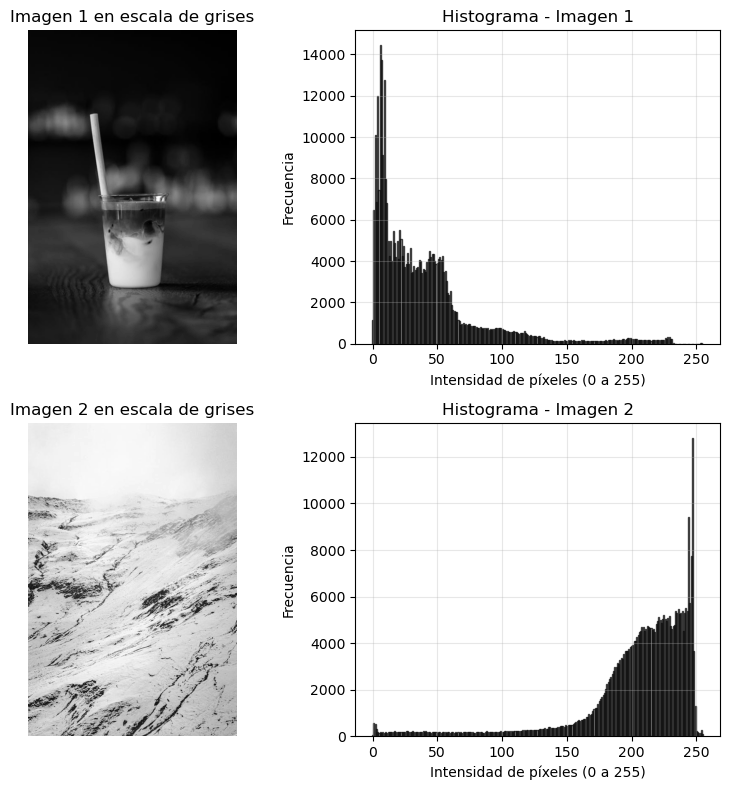

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# Mostrar la primera imagen en escala de grises
axes[0, 0].imshow(gray_image1, cmap='gray')
axes[0, 0].axis("off")
axes[0, 0].set_title("Imagen 1 en escala de grises")

# Graficar el histograma de la primera imagen
axes[0, 1].bar(range(256), histogram_data1, color='gray', edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Histograma - Imagen 1")
axes[0, 1].set_xlabel("Intensidad de píxeles (0 a 255)")
axes[0, 1].set_ylabel("Frecuencia")
axes[0, 1].grid(alpha=0.3)

# Mostrar la segunda imagen en escala de grises
axes[1, 0].imshow(gray_image2, cmap='gray')
axes[1, 0].axis("off")
axes[1, 0].set_title("Imagen 2 en escala de grises")

# Graficar el histograma de la segunda imagen
axes[1, 1].bar(range(256), histogram_data2, color='gray', edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Histograma - Imagen 2")
axes[1, 1].set_xlabel("Intensidad de píxeles (0 a 255)")
axes[1, 1].set_ylabel("Frecuencia")
axes[1, 1].grid(alpha=0.3)

# Mostrar la figura
plt.tight_layout()
plt.show()

### Comparación de histogramas
Esta sección compara las características principales de ambos histogramas, como la media y la varianza de los niveles de intensidad.


In [7]:
def analyze_histogram(histogram):
    total_pixels = sum(histogram)
    levels = np.arange(256)
    mean = np.dot(histogram, levels) / total_pixels
    variance = np.dot(histogram, (levels - mean)**2) / total_pixels
    return mean, variance

mean1, variance1 = analyze_histogram(histogram_data1)
mean2, variance2 = analyze_histogram(histogram_data2)

print(f"Imagen 1 - Media: {mean1:.2f}, Varianza: {variance1:.2f}")
print(f"Imagen 2 - Media: {mean2:.2f}, Varianza: {variance2:.2f}")

Imagen 1 - Media: 40.79, Varianza: 1865.84
Imagen 2 - Media: 203.62, Varianza: 2080.28


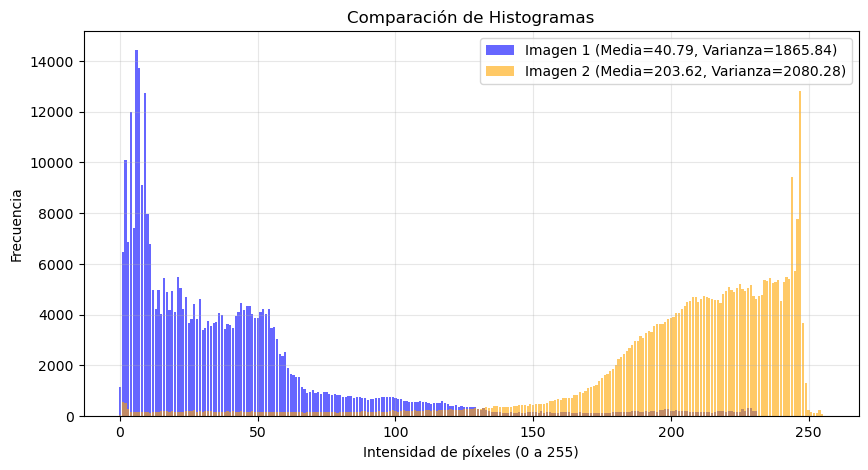

In [8]:
# Gráfica comparativa
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram_data1, color='blue', alpha=0.6, label=f"Imagen 1 (Media={mean1:.2f}, Varianza={variance1:.2f})")
plt.bar(range(256), histogram_data2, color='orange', alpha=0.6, label=f"Imagen 2 (Media={mean2:.2f}, Varianza={variance2:.2f})")
plt.xlabel("Intensidad de píxeles (0 a 255)")
plt.ylabel("Frecuencia")
plt.title("Comparación de Histogramas")
plt.legend()
plt.grid(alpha=0.3)
plt.show()